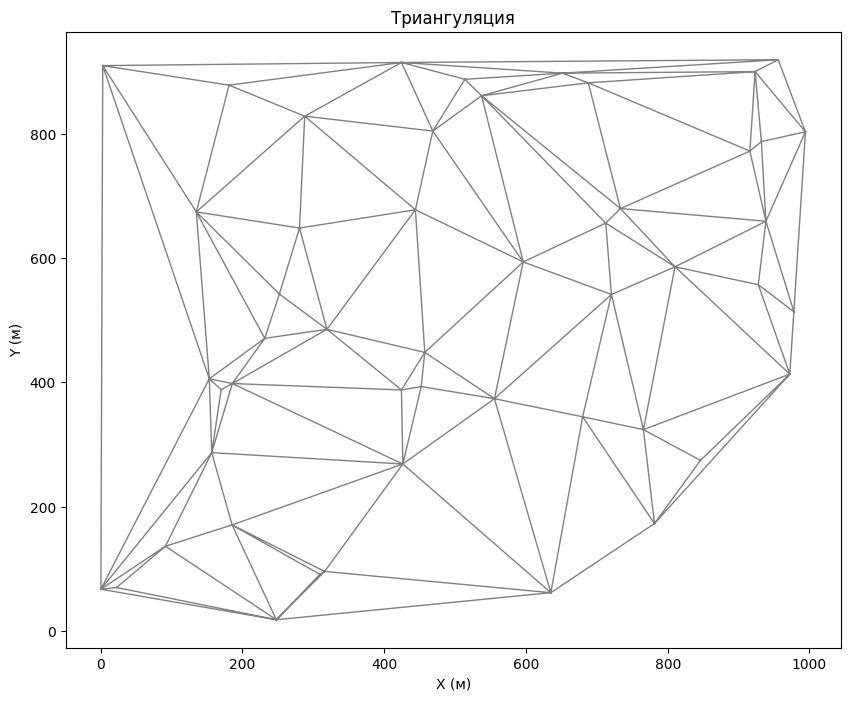

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

N = 11
num_points = 50
square_size = 1000
height_range = (0, 100 * N)

x = np.random.uniform(0, square_size, num_points)
y = np.random.uniform(0, square_size, num_points)
z = np.random.uniform(height_range[0], height_range[1], num_points)
points = np.column_stack((x, y))

# Итеративный алгоритм «Удаляй и строй»
def iterative_remove_and_build(points):
    def in_circumcircle(triangle, p):
        ax, ay = triangle[0]
        bx, by = triangle[1]
        cx, cy = triangle[2]
        dx, dy = p 

        mat = np.array([
            [ax, ay, ax**2 + ay**2, 1],
            [bx, by, bx**2 + by**2, 1],
            [cx, cy, cx**2 + cy**2, 1],
            [dx, dy, dx**2 + dy**2, 1]
        ])
        return np.linalg.det(mat) > 0

    def remove_bad_triangles(triangles, p):
        bad_triangles = []
        for triangle in triangles:
            if in_circumcircle(triangle, p):
                bad_triangles.append(triangle)
        return bad_triangles

    def add_triangle(p, bad_triangles):
        new_triangles = []
        for triangle in bad_triangles:
            new_triangles.append([triangle[0], triangle[1], p])
            new_triangles.append([triangle[1], triangle[2], p])
            new_triangles.append([triangle[2], triangle[0], p])
        return new_triangles

    triangles = []
    for i in range(len(points)):
        p = points[i]
        bad_triangles = remove_bad_triangles(triangles, p)
        triangles = add_triangle(p, bad_triangles)
    
    return triangles

triangles = iterative_remove_and_build(points)

triangle_indices = []
for triangle in triangles:
    indices = [np.where(np.all(points == pt, axis=1))[0][0] for pt in triangle]
    triangle_indices.append(indices)

plt.figure(figsize=(10, 8))
plt.triplot(x, y, triangle_indices, color='gray', lw=1.0)
# plt.scatter(x, y, c=z, cmap='jet', marker='o')
# plt.colorbar(label='Высота (м)')
plt.xlabel('X (м)')
plt.ylabel('Y (м)')
plt.title('Триангуляция')
plt.show()